<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/Joao_Siqueira_Portifolio/blob/master/Analysis_of_COVID-19_scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Covid-19 through Pandas and Matplotlib

<center><img alt="COVID-19 Outbreak" width="%" src="https://www.dropbox.com/s/f3dsj2s4ge7z50r/279.jpg?dl=1"></center>

The Coronavirus outbreak in 2020 can be considered one of the greatest challenges the world has faced in the last century. I have written this article on november 13 and the number of deaths is 1.297.347 in the whole world. In contrary of what many people think, Covid's proagnosis is not so terrible when compared to other deseases. Ebola outbreak in Western Africa in 2014 presented a fatality rate of around 70% in patients between 15 and 44 years old (Yes, only 3 in 10 patients could survive!). The problem about Covid-19 is how contagious it is. Differently from other deseases, such as Ebola that once you have it you need to be hospitalized, Covid-19 is a brief and mild desease for many people and some are even asymptomatics. This way, infected people can move around and infect many others. The desease has its origin in China and in a so globalized world it soon was present in every continent. I don't need to describe how serious this desease was ... I am sure everyone who is reading this article witnessed the caos Covid-19 brought to many countries. 
The Covid-19 outbreak is not the first pandemic the world has faced but it certainly is the first time we can overcome it through technology and of course data. Therefore, that's a great opportunity to analyze and have some insights from this desease. 
For this analysis, we are going to use two Python libraries: Pandas to manipulate the data and Matplotlib for data vizualisation. This is a simple exploratory data analysis (EDA) but much can be done and you will see how easy to work with and powerful these libraries are.

This work includes:

* Overall analysis of the dataset

* Analysis of the countries with highest total numbers of Covid-19 cases and deaths through bar chart.

* Analysis the evolution of total numbers of cases and deaths in the world.

* Analysis of Covid-19 scenario in Brazil from the first case until now.

* Comparison of USA, India and Brazil considering 7-day moving everage values of total and new cases and deaths.




## Data acquisition

The data present in this analysis was taken from the [ourworldindata.org](https://github.com/owid/covid-19-data/tree/master/public/data). The data is related to the whole world until november 17th. It is important to highlight that Covid-19 is new desease and it would be impossible to inform the axact number of Covid cases for example. No organiztion could do it. The main source of this data is the European Centre for Disease Prevention and Control (ECDC). This data is also collected from a variety of sources such as (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information about the data source can be found [here.](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

## Variable dictionary

This dataset features 51 variables. You can have a detailed decription of these variables [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).



## Importing the dataset

As said before, the dataset used in this analysis is obtained at `ourworldindata.org`. You can download this data [here.](https://https://github.com/owid/covid-19-data/tree/master/public/data). Let's import the data from `csv` format into a variable `df`.   

In [ ]:
#importing the dataset

import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Exploratory data analysis 

In this section we are going to explore our dataset. Pandas library has some handy commands to make it. Let's do it!



### Overall Analysis

In [ ]:
# A very first look on the data

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
# How big is the dataset?

df.shape

print("This data set has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This data set has 61565 rows and 50 columns.


In [ ]:
# The columns reprsent the variables of this dataset. Let's see what we have here.

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [ ]:
# And let's see what kind of variables there are in the dataset.

df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Well ... Now we have a better sense of how this dataset looks like ... We could figure out how big the dataset is (df.shape), the name of the variables (df.columns) and what kind of variables are present in the dataset (df.dtypes). By taking a look at the first 5 rows it was possible to see that there plenty of null values in aour dataset. And we are going to work on it now. Let's see the percentage of null values in our dataset.

In [ ]:
# Knowing the percentage of null values in our dataset

df.isnull().sum()/df.shape[0]

iso_code                              0.005198
continent                             0.010412
location                              0.000000
date                                  0.000000
total_cases                           0.146837
new_cases                             0.002014
new_cases_smoothed                    0.017624
total_deaths                          0.275757
new_deaths                            0.002014
new_deaths_smoothed                   0.017624
total_cases_per_million               0.151791
new_cases_per_million                 0.007212
new_cases_smoothed_per_million        0.022740
total_deaths_per_million              0.280500
new_deaths_per_million                0.007212
new_deaths_smoothed_per_million       0.022740
reproduction_rate                     0.329830
icu_patients                          0.923755
icu_patients_per_million              0.923755
hosp_patients                         0.907756
hosp_patients_per_million             0.907756
weekly_icu_ad

The percentage of null values varies a lot in our dataset. Some variables, such as date and location, present no null value. On the other hand, information about hospitalization (icu_patients, weekly_icu_admissions, etc) is almost non existent, featuring more than 90% of null values. Let's see the ten variables that present null values the most and the least.  

In [ ]:
# Checking the varibles that present null values the most

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)[0:11]

weekly_icu_admissions                 0.992577
weekly_icu_admissions_per_million     0.992577
weekly_hosp_admissions_per_million    0.987948
weekly_hosp_admissions                0.987948
icu_patients                          0.923755
icu_patients_per_million              0.923755
hosp_patients                         0.907756
hosp_patients_per_million             0.907756
new_tests                             0.608739
new_tests_per_thousand                0.608739
total_tests                           0.606286
dtype: float64

In [ ]:
#Checking the variables that present null values the least

(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)[0:11]

location                  0.000000
date                      0.000000
new_deaths                0.002014
new_cases                 0.002014
population                0.005198
iso_code                  0.005198
new_cases_per_million     0.007212
new_deaths_per_million    0.007212
life_expectancy           0.010396
continent                 0.010412
new_cases_smoothed        0.017624
dtype: float64

More detailed information is missed but very important information such as `new_cases` and `new_deaths` are almost complete and and therefore much can be analyzed in this data.

One important thing to do is to set the date in the dataset to datetime format so that we can manipulate date through dates ... Let's convert the date into this format.

In [ ]:
# Converting the date into datetime format

df["date"] = pd.to_datetime(df.date)

### Analysing the countries with highest numbers in Covid-19 deaths and cases

So far we have only had a first impression of the dataset. Finally, we are going to explore and extract information about the COVID-19 outbreak. Let's use the Pandas library to know what are the countries that present higher numbers of deaths and Covid cases. 

In [ ]:
# Finding the 5 countries with the highest number of deaths 

df.loc[df.date == "2020-11-18"].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58024,USA,North America,United States,2020-11-18,11542408.0,170513.0,161473.286,250621.0,1897.0,1226.429,34871.044,515.141,487.831,757.157,5.731,3.705,1.18,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,176450201.0,1918381.0,533.078,5.796,1582227.0,4.780,NaN,NaN,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7660,BRA,South America,Brazil,2020-11-18,5945849.0,34091.0,28312.714,167455.0,756.0,583.857,27972.646,160.383,133.199,787.803,3.557,2.747,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24372,IND,Asia,India,2020-11-18,8958483.0,45576.0,39223.857,131578.0,585.0,493.857,6491.634,33.026,28.423,95.346,0.424,0.358,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,0.041,24.4,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
35595,MEX,North America,Mexico,2020-11-18,1015071.0,3918.0,4127.714,99528.0,502.0,442.571,7872.872,30.388,32.014,771.937,3.894,3.433,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
57703,GBR,Europe,United Kingdom,2020-11-18,1434004.0,19645.0,24829.429,53368.0,529.0,415.857,21123.706,289.382,365.752,786.141,7.792,6.126,0.86,1430.0,21.065,16526.0,243.438,NaN,NaN,NaN,NaN,34546200.0,336942.0,508.885,4.963,310925.0,4.580,0.080,12.5,tests performed,63.89,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [ ]:
# Finding the 5 countries with the highest number of Covid-19 cases

df.loc[df.date == "2020-11-18"].sort_values(by="total_cases", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58024,USA,North America,United States,2020-11-18,11542408.0,170513.0,161473.286,250621.0,1897.0,1226.429,34871.044,515.141,487.831,757.157,5.731,3.705,1.18,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,176450201.0,1918381.0,533.078,5.796,1582227.0,4.780,NaN,NaN,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24372,IND,Asia,India,2020-11-18,8958483.0,45576.0,39223.857,131578.0,585.0,493.857,6491.634,33.026,28.423,95.346,0.424,0.358,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,0.041,24.4,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7660,BRA,South America,Brazil,2020-11-18,5945849.0,34091.0,28312.714,167455.0,756.0,583.857,27972.646,160.383,133.199,787.803,3.557,2.747,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
19181,FRA,Europe,France,2020-11-18,2115717.0,28534.0,28713.571,46772.0,426.0,596.143,32413.102,437.145,439.896,716.554,6.526,9.133,0.91,4759.0,72.909,32811.0,502.669,NaN,NaN,NaN,NaN,NaN,228931.0,NaN,3.507,251638.0,3.855,0.149,6.7,tests performed,78.70,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
44555,RUS,Europe,Russia,2020-11-18,1975629.0,20717.0,21897.714,34068.0,449.0,391.714,13537.783,141.961,150.052,233.447,3.077,2.684,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70653231.0,577345.0,484.144,3.956,563253.0,3.860,0.039,25.7,tests performed,47.69,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


That's a good first approach to know more about the Covid-19 scenario in the world. However, there is a better way to display this information. Let's plot it! To do so, let's use `Matplotlib` library. Let's first plot a histogram of the total number of cases and deaths.

Seaborn library has only been imported to better Matplotlib layout (`sns.set()`).

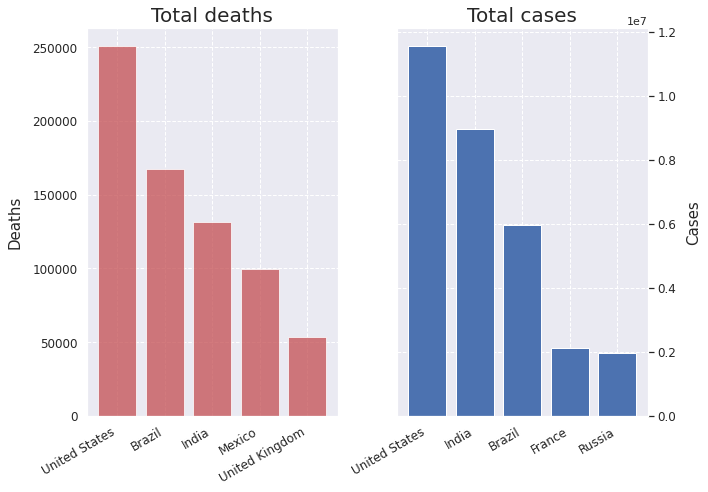

In [ ]:
# importing Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# creating a graph of total number of cases
sns.set()

top5_total_deaths = df.loc[df.date == "2020-11-18", ["location", "total_deaths"]].sort_values(by="total_deaths", ascending=False)[1:6]
top5_total_cases = df.loc[df.date == "2020-11-18", ["location", "total_cases"]].sort_values(by="total_cases", ascending=False)[1:6]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax1.bar(x=top5_total_deaths["location"], height=top5_total_deaths["total_deaths"], facecolor="r", alpha=0.75)
ax1.set_title("Total deaths", fontsize = 20)
ax1.set_ylabel("Deaths", fontsize=15, labelpad=10, )
ax1.grid(ls="--")
ax1.tick_params(labelsize=12)


ax2.bar(x="location", height="total_cases", data = top5_total_cases)
ax2.set_title("Total cases", fontsize=20)
ax2.set_ylabel("Cases", fontsize=15, labelpad=10)
ax2.grid(ls="--")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(labelsize=12)


fig.autofmt_xdate()

plt.tight_layout()


Well ... In this first analysis, by comparing number of cases and deaths, it possible to have a good sense of the mortality rate of these countries. Comparing India and Brazil, for example, it is clear that mortality rate in Brazil is higher. It is expected that India presents higher number of cases once its population is higher than 1 billion but the number of deaths is considerable lower than Brazil's number. Why is that? In this simple analysis it also noticeable that Mexico also presents high mortality rate. It is not even in the top five contries with higher number of cases but presents almost 100 thousand deaths! On the other hand, european countries such as France and Russia present lower mortality rate. It does not apply to UK. This is certainly related to England's health policy response that presented more flexible social distancing rules in the beginning of the pandemic when compared to other european countries. 

Let's now analyze the evolution of the number of cases and deaths of these countries. But first let's see the total number of deaths and cases in the world.

### Analyzing the evolution of Covid-19 cases and deaths in the world

In [ ]:
#Obtaining part of the dataset to be used in the world analysis

cases_world = df.loc[df.location == "World", ["date","total_cases"]]
deaths_world = df.loc[df.location=="World", ["date","total_deaths"]]


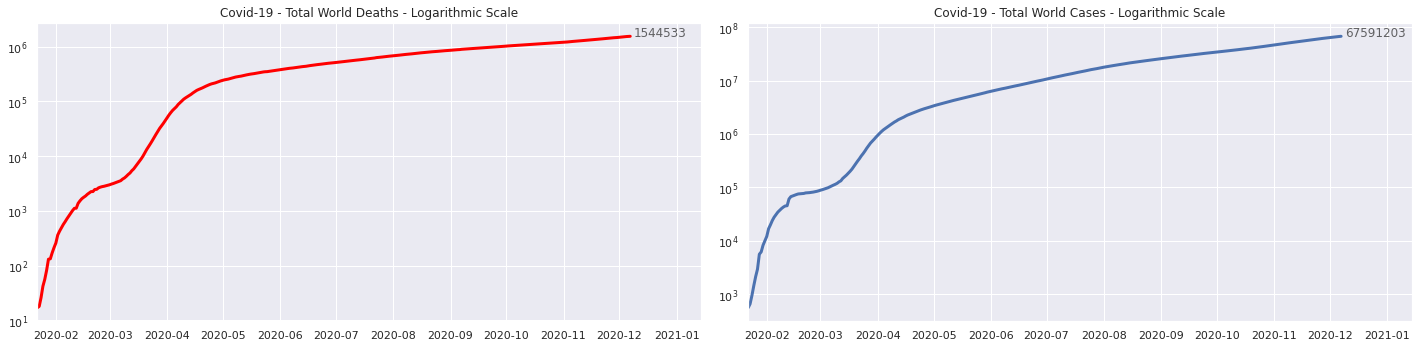

In [ ]:
#Line plot for total deaths and cases in the world

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))


ax2.plot(cases_world["date"], cases_world["total_cases"], linewidth=3, color=None, linestyle="solid")
ax2.set_yscale("log")
ax2.text(x=cases_world.iloc[-1,0] + dt.timedelta(days=2), y=cases_world.iloc[-1,1], s=f'{int(cases_world.iloc[-1,1])}', alpha=0.7)
ax2.set_title("Covid-19 - Total World Cases - Logarithmic Scale")
ax2.set_xlim(cases_world.iloc[0,0], cases_world.iloc[-1,0] + dt.timedelta(days=38))

# df_countries_4.iloc[0,0], df_countries_4.iloc[-1,0] + dt.timedelta(days=25)


ax1.plot(deaths_world["date"], deaths_world["total_deaths"], linewidth=3, color="red", linestyle="solid")
ax1.set_yscale("log")
ax1.text(x=deaths_world.iloc[-1,0] + dt.timedelta(days=2), y=deaths_world.iloc[-1,1], s=f'{int(deaths_world.iloc[-1,1])}', alpha=0.7)
ax1.set_xlim(deaths_world.iloc[0,0], deaths_world.iloc[-1,0] + dt.timedelta(days=38))
ax1.set_title("Covid-19 - Total World Deaths - Logarithmic Scale")
plt.tight_layout()

Because our data varies a lot, the number of cases and deaths of Covid-19 has been represented in a logarithmic scale. This result shows that the increase of death follows suit the increase of cases. February presented higher rate of cases and deaths. It may be related to the beginning of the Coronavirus outbreak when nobody had idea of how serious the desease was. Yet it was winter in Europe that is when viral diseases are more common. 

### Analyzing Brazil scenario of Covid-19 in the world 

Let's now plot the evolution of Covid-19 in Brazil, in comparison to the top five countries in cases and deaths in the world. 

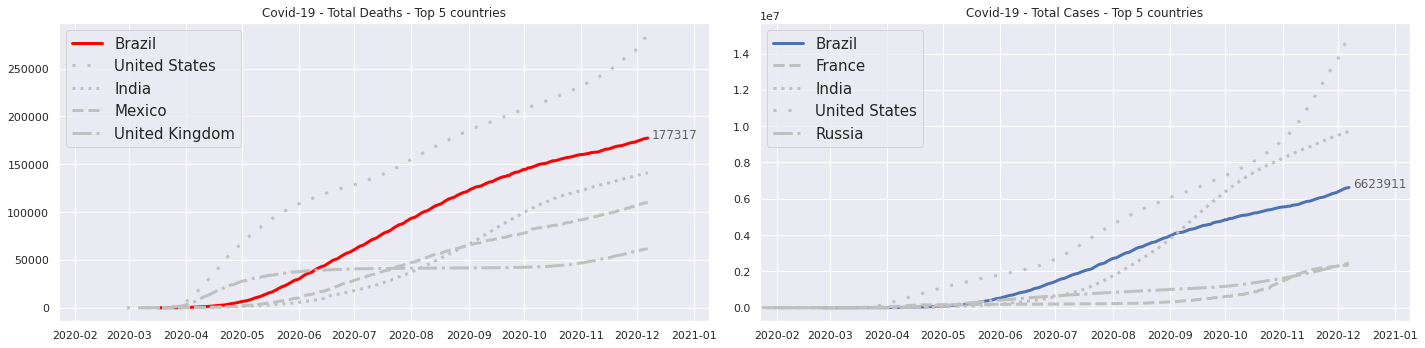

In [ ]:
cases_brazil = df.loc[df.location=="Brazil", ["date", "total_cases"]]
deaths_brazil = df.loc[df.location=="Brazil", ["date", "total_deaths"]]

cases_usa = df.loc[df.location=="United States", ["date", "total_cases"]]
deaths_usa = df.loc[df.location=="United States", ["date", "total_deaths"]]

cases_india = df.loc[df.location=="India", ["date", "total_cases"]]
deaths_india = df.loc[df.location=="India", ["date", "total_deaths"]]

cases_france = df.loc[df.location=="France", ["date", "total_cases"]]

cases_russia = df.loc[df.location=="Russia", ["date", "total_cases"]]

deaths_mexico = df.loc[df.location=="Mexico", ["date", "total_deaths"]]

deaths_uk = df.loc[df.location=="United Kingdom", ["date", "total_deaths"]]



fig, (x1, x2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

#Plotting the cases

x2.plot(cases_brazil["date"], cases_brazil["total_cases"],linewidth=3, color=None, 
         markeredgecolor="w", markeredgewidth=0.5, label="Brazil")
x2.plot(cases_france["date"], cases_france["total_cases"], linewidth=3, ls="--", color="#C0C0C0", label="France")
x2.plot(cases_india["date"], cases_india["total_cases"], linewidth=3, ls=":", color="#C0C0C0", label="India")
x2.plot(cases_usa["date"], cases_usa["total_cases"], linewidth=3, ls=(0, (1, 4)), color="#C0C0C0", label="United States")
x2.plot(cases_russia["date"], cases_russia["total_cases"], linewidth=3, ls="-." , color="#C0C0C0", label="Russia")
x2.text(x=cases_brazil.iloc[-1,0] + dt.timedelta(days=2), y=cases_brazil.iloc[-1,1], s=f'{int(cases_brazil.iloc[-1,1])}', alpha=0.7)
x2.set_xlim(cases_brazil.iloc[0,0], cases_brazil.iloc[-1,0] + dt.timedelta(days=33))
x2.legend(loc="upper left", prop={'size': 15})
x2.set_title("Covid-19 - Total Cases - Top 5 countries")

#plotting the deaths

x1.plot(deaths_brazil["date"], deaths_brazil["total_deaths"],linewidth=3, color="red", 
         markeredgecolor="w", markeredgewidth=0.5, label="Brazil")
x1.plot(deaths_usa["date"], deaths_usa["total_deaths"], linewidth=3, ls=(0, (1, 4)), color="#C0C0C0", label="United States")
x1.plot(deaths_india["date"], deaths_india["total_deaths"], linewidth=3, ls=":", color="#C0C0C0", label="India")
x1.plot(deaths_mexico["date"], deaths_mexico["total_deaths"], linewidth=3,ls="--" , color="#C0C0C0", label="Mexico")
x1.plot(deaths_uk["date"], deaths_uk["total_deaths"], linewidth=3, ls="-." , color="#C0C0C0", label="United Kingdom")
x1.text(x=deaths_brazil.iloc[-1,0] + dt.timedelta(days=2), y=deaths_brazil.iloc[-1,1], s=f'{int(deaths_brazil.iloc[-1,1])}', alpha=0.7)
x1.set_xlim(deaths_brazil.iloc[0,0], deaths_brazil.iloc[-1,0] + dt.timedelta(days=33))
x1.legend(loc="upper left", prop={'size': 15})
x1.set_title("Covid-19 - Total Deaths - Top 5 countries")



plt.tight_layout()


It is known that the Covid-19 first stroke eastern countries, Europe and later USA and south american countries. When was the first case in Brazil? Let's see the very beginning of the dataset ... 

In [ ]:
df[df.location=="Brazil"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7360,BRA,South America,Brazil,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7361,BRA,South America,Brazil,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7362,BRA,South America,Brazil,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7363,BRA,South America,Brazil,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7364,BRA,South America,Brazil,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


Well ... By the beginning of 2020 there was no recorded Covid-19 case in Brazil. Through a better data manipulation it is possible to obtain this information. Let's do it.

In [ ]:
# Finding the first Covid-19 case in Brazil

Brazil = df[df.location=="Brazil"]

first_case_brazil = Brazil[Brazil.total_cases==1].iloc[0,3]

print("Brazil's first case was on {}.".format(first_case_brazil.date()))


Brazil's first case was on 2020-02-26.


Let's find now the first death in Brazil ... 

In [ ]:
# Finding the first Covid-19 death in Brazil

first_death_brazil = Brazil[Brazil.total_deaths==1].iloc[0,3]

print("Brazil's first death happened on {}.".format(first_death_brazil.date()))

Brazil's first death happened on 2020-03-17.


Right ... Let's see how many days it took from the first case and the first death in Brazil.

In [ ]:
# Number of days from the first case and first death

delta = first_death_brazil-first_case_brazil

print("It took {} days to have the first death in Brazil when the first Covid-19 case was recorded.".format(delta.days))


It took 20 days to have the first death in Brazil when the first Covid-19 case was recorded.


### Analysis of countries with highest numbers of cases and deaths

The next analysis will be the participation the top 3 countries have had in deaths and cases of Covid-19. To do so, we are going to use [waffle charts](https://pywaffle.readthedocs.io/en/latest/) for visualization. Let's do it!

In [ ]:
# Installing Waffle chart 

!pip install pywaffle -q


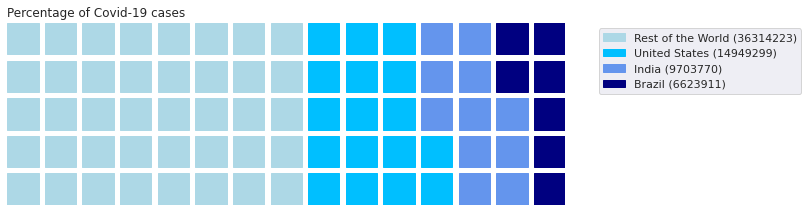

In [ ]:
from pywaffle import Waffle

# Calculating the number of cases and deaths - First try

world = df.loc[df.location=="World"]
total_cases_world = world["total_cases"].max()
total_deaths_world = world["total_deaths"].max()

# USA
total_cases_usa = cases_usa["total_cases"].max()
total_deaths_usa = deaths_usa["total_deaths"].max()

# Brazil
total_cases_brazil = cases_brazil["total_cases"].max()
total_deaths_brazil = deaths_brazil["total_deaths"].max()

# India
total_cases_india = cases_india["total_cases"].max()
total_deaths_india = deaths_india["total_deaths"].max()

#Resto of the World (rotw)
total_cases_rotw = total_cases_world - total_cases_usa - total_cases_brazil - total_cases_india
total_deaths_rotw = total_deaths_world - total_deaths_usa - total_deaths_india - total_deaths_brazil

# Creating a data frame from these information 
dfw = pd.DataFrame(data={"Countries": ["Rest of the World", "United States", "India", "Brazil"],
                   "Total Cases": [total_cases_rotw, total_cases_usa, total_cases_india, total_cases_brazil],
                   "Total Deaths": [total_deaths_rotw, total_deaths_usa, total_deaths_brazil, total_deaths_india],})

# Creating the Waffle Chart - Cases
data1 = {"Rest of the World": dfw.iloc[0,1], "United States": dfw.iloc[1,1], "India": dfw.iloc[2,1], "Brazil": dfw.iloc[3,1]}
fig = plt.figure(
                FigureClass=Waffle,
                 rows = 5,
                 columns = 15,
                 figsize = (10,5),
                 colors = ["#ADD8E6", "#00BFFF", "#6495ED", "#000080"],
                 labels = [f"Rest of the World ({int(total_cases_rotw)})", 
                                    f"United States ({int(total_cases_usa)})",
                                    f"India ({int(total_cases_india)})",
                                    f"Brazil ({int(total_cases_brazil)})"],
                 title={"label":"Percentage of Covid-19 cases", "loc":"left"},
                 values=data1, 
                 legend={"loc": "upper left",'bbox_to_anchor': (1.05, 1)},
                                
                 )
fig.set_tight_layout(False)
plt.show()

Waffle Charts give us a very good idea of the contribution of these countries. However, lets creat a simple data frame with the percentage of contribution. 

In [ ]:
# Creating a DataFrame of contribution percentage

dfc = pd.DataFrame(data={"Countries": ["United States", "India", "Brazil"],
                    "Total Cases": [total_cases_usa, total_cases_india, total_cases_brazil],
                    "Country %": [round(total_cases_usa/total_cases_world*100,2), round(total_cases_india/total_cases_world*100,2), round(total_cases_brazil/total_cases_world*100,2)]})

dfc


,Countries,Total Cases,Country %
0,United States,14949299.0,22.12
1,India,9703770.0,14.36
2,Brazil,6623911.0,9.80


Great ... Let's do the same analysis for the total number of death.

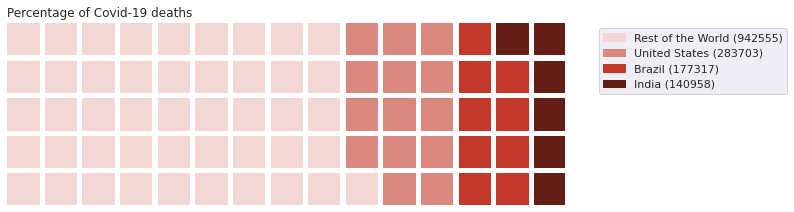

In [ ]:
# Creating the Waffle Chart - Deaths
data2 = {"Rest of the World": dfw.iloc[0,2], "United States": dfw.iloc[1,2], "India": dfw.iloc[2,2], "Brazil": dfw.iloc[3,2]}
fig = plt.figure(
                FigureClass=Waffle,
                 rows = 5,
                 columns = 15,
                 figsize = (10,5),
                 colors = ["#F2D7D5", "#D98880", "#C0392B", "#641E16"],
                 labels = [f"Rest of the World ({int(total_deaths_rotw)})", 
                          f"United States ({int(total_deaths_usa)})",
                          f"Brazil ({int(total_deaths_brazil)})",
                          f"India ({int(total_deaths_india)})",],
                 title={"label":"Percentage of Covid-19 deaths", "loc":"left"},
                 values=data2, 
                 legend={"loc": "upper left",'bbox_to_anchor': (1.05, 1)},
                                
                 )
fig.set_tight_layout(False)
plt.show()


In [ ]:
# Creating a DataFrame of contribution percentage

dfd = pd.DataFrame(data={"Countries": ["United States", "Brazil", "India"],
                    "Total Deaths": [total_deaths_usa, total_deaths_india, total_deaths_brazil],
                    "Country %": [round(total_deaths_usa/total_deaths_world*100,2), round(total_deaths_brazil/total_deaths_world*100,2), round(total_deaths_india/total_deaths_world*100,2)]})

dfd

,Countries,Total Deaths,Country %
0,United States,283703.0,18.37
1,Brazil,140958.0,11.48
2,India,177317.0,9.13


In [ ]:
dfw

,Countries,Total Cases,Total Deaths
0,Rest of the World,36314223.0,942555.0
1,United States,14949299.0,283703.0
2,India,9703770.0,177317.0
3,Brazil,6623911.0,140958.0


Let's now see how the the evolution of the number of cases and deaths along the year for these countries. To accomplish this task let's consider a 7-day rolling average graph. 

The first thing is to create a dataframe containing total data from the world and the other countries. Let's do it.

In [ ]:
# Choosing the columns that matters to us

col = ["location","date", 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']

# Creating the DataFrames 

df_world = df.loc[df.location=="World", col]
df_usa = df.loc[df["location"]=="United States", col]
df_brazil = df.loc[df.location == "Brazil", col]
df_india = df.loc[df.location == "India", col]

#Merging the DataFrames

df_countries = df_world.merge(df_usa, on="date", suffixes=("_world","_usa"))

df_countries_2 = df_countries.merge(df_brazil, on="date", suffixes=(None, "_brazil"))

df_countries_3 = df_countries_2.merge(df_india, on="date", suffixes=(None, "_india"))

df_countries_3 = df_countries_3.rename(columns={"total_cases":"total_cases_brazil", "total_deaths":"total_deaths_brazil", "new_cases":"new_cases_brazil", "new_deaths":"new_deaths_brazil"})


#dropping useless columns

df_countries_3.drop(labels=["location_world", "location_usa", "location", "location_india"], axis=1, inplace=True)

df_countries_3

,date,total_cases_world,total_deaths_world,new_cases_world,new_deaths_world,total_cases_usa,total_deaths_usa,new_cases_usa,new_deaths_usa,total_cases_brazil,total_deaths_brazil,new_cases_brazil,new_deaths_brazil,total_cases_india,total_deaths_india,new_cases_india,new_deaths_india
0,2020-01-23,654.0,18.0,99.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
1,2020-01-24,941.0,26.0,287.0,8.0,2.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2,2020-01-25,1434.0,42.0,493.0,16.0,2.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
3,2020-01-26,2118.0,56.0,684.0,14.0,5.0,NaN,3.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
4,2020-01-27,2927.0,82.0,809.0,26.0,5.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-12-03,65221042.0,1506260.0,690523.0,12518.0,14139577.0,276325.0,217664.0,2879.0,6487084.0,175270.0,50434.0,755.0,9571559.0,139188.0,36595.0,540.0
316,2020-12-04,65899443.0,1518670.0,678401.0,12410.0,14367462.0,278932.0,227885.0,2607.0,6533968.0,175964.0,46884.0,694.0,9608211.0,139700.0,36652.0,512.0
317,2020-12-05,66540036.0,1528868.0,640593.0,10198.0,14581337.0,281186.0,213875.0,2254.0,6577177.0,176628.0,43209.0,664.0,9644222.0,140182.0,36011.0,482.0
318,2020-12-06,67073730.0,1536056.0,533694.0,7188.0,14757000.0,282299.0,175663.0,1113.0,6603540.0,176941.0,26363.0,313.0,9677203.0,140573.0,32981.0,391.0


Great ... The following steps are summarized below:


* To calculate each country's participation for each column;

* To fill the null values left by divisions by zero with zero;

* To drop the columns that are not usable anymore;

* To apply an equation to transform each column a 7-day average;

* To fill null values after  caclculating the moving average with zero.



In [ ]:
# Calculating each country's participation for each column

# USA

df_countries_3["total_deaths_usa"] = df_countries_3["total_deaths_usa"]/df_countries_3["total_deaths_world"]
df_countries_3["total_deaths_usa"] = round(df_countries_3["total_deaths_usa"]*100,2)

df_countries_3["total_cases_usa"] = df_countries_3["total_cases_usa"]/df_countries_3["total_cases_world"]
df_countries_3["total_cases_usa"] = round(df_countries_3["total_cases_usa"]*100,2)

df_countries_3["new_cases_usa"] = df_countries_3["new_cases_usa"]/df_countries_3["new_cases_world"]
df_countries_3["new_cases_usa"] = round(df_countries_3["new_cases_usa"]*100,2)

df_countries_3["new_deaths_usa"] = df_countries_3["new_deaths_usa"]/df_countries_3["new_deaths_world"]
df_countries_3["new_deaths_usa"] = round(df_countries_3["new_deaths_usa"]*100,2)

# Brazil

df_countries_3["total_cases_brazil"] = round(df_countries_3["total_cases_brazil"]/df_countries_3["total_cases_world"]*100,2)
df_countries_3["total_deaths_brazil"] = round(df_countries_3["total_deaths_brazil"]/df_countries_3["total_deaths_world"]*100,2)
df_countries_3["new_cases_brazil"] = round(df_countries_3["new_cases_brazil"]/df_countries_3["new_cases_world"]*100,2)
df_countries_3["new_deaths_brazil"] = round(df_countries_3["new_deaths_brazil"]/df_countries_3["new_deaths_world"]*100,2)

# India

df_countries_3["total_cases_india"] = round(df_countries_3["total_cases_india"]/df_countries_3["total_cases_world"]*100,2)
df_countries_3["total_deaths_india"] = round(df_countries_3["total_deaths_india"]/df_countries_3["total_deaths_world"]*100,2)
df_countries_3["new_cases_india"] = round(df_countries_3["new_cases_india"]/df_countries_3["new_cases_world"]*100,2)
df_countries_3["new_deaths_india"] = round(df_countries_3["new_deaths_india"]/df_countries_3["new_deaths_world"]*100,2)





df_countries_3

,date,total_cases_world,total_deaths_world,new_cases_world,new_deaths_world,total_cases_usa,total_deaths_usa,new_cases_usa,new_deaths_usa,total_cases_brazil,total_deaths_brazil,new_cases_brazil,new_deaths_brazil,total_cases_india,total_deaths_india,new_cases_india,new_deaths_india
0,2020-01-23,654.0,18.0,99.0,1.0,0.15,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00
1,2020-01-24,941.0,26.0,287.0,8.0,0.21,NaN,0.35,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00
2,2020-01-25,1434.0,42.0,493.0,16.0,0.14,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00
3,2020-01-26,2118.0,56.0,684.0,14.0,0.24,NaN,0.44,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00
4,2020-01-27,2927.0,82.0,809.0,26.0,0.17,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-12-03,65221042.0,1506260.0,690523.0,12518.0,21.68,18.35,31.52,23.00,9.95,11.64,7.30,6.03,14.68,9.24,5.30,4.31
316,2020-12-04,65899443.0,1518670.0,678401.0,12410.0,21.80,18.37,33.59,21.01,9.92,11.59,6.91,5.59,14.58,9.20,5.40,4.13
317,2020-12-05,66540036.0,1528868.0,640593.0,10198.0,21.91,18.39,33.39,22.10,9.88,11.55,6.75,6.51,14.49,9.17,5.62,4.73
318,2020-12-06,67073730.0,1536056.0,533694.0,7188.0,22.00,18.38,32.91,15.48,9.85,11.52,4.94,4.35,14.43,9.15,6.18,5.44


In [ ]:
df_countries_4 = df_countries_3


# Filling null values

df_countries_4.fillna(value=0, inplace=True)

df_countries_4

,date,total_cases_world,total_deaths_world,new_cases_world,new_deaths_world,total_cases_usa,total_deaths_usa,new_cases_usa,new_deaths_usa,total_cases_brazil,total_deaths_brazil,new_cases_brazil,new_deaths_brazil,total_cases_india,total_deaths_india,new_cases_india,new_deaths_india
0,2020-01-23,654.0,18.0,99.0,1.0,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-01-24,941.0,26.0,287.0,8.0,0.21,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-01-25,1434.0,42.0,493.0,16.0,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-26,2118.0,56.0,684.0,14.0,0.24,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-27,2927.0,82.0,809.0,26.0,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-12-03,65221042.0,1506260.0,690523.0,12518.0,21.68,18.35,31.52,23.00,9.95,11.64,7.30,6.03,14.68,9.24,5.30,4.31
316,2020-12-04,65899443.0,1518670.0,678401.0,12410.0,21.80,18.37,33.59,21.01,9.92,11.59,6.91,5.59,14.58,9.20,5.40,4.13
317,2020-12-05,66540036.0,1528868.0,640593.0,10198.0,21.91,18.39,33.39,22.10,9.88,11.55,6.75,6.51,14.49,9.17,5.62,4.73
318,2020-12-06,67073730.0,1536056.0,533694.0,7188.0,22.00,18.38,32.91,15.48,9.85,11.52,4.94,4.35,14.43,9.15,6.18,5.44


In [ ]:
# Making each column a 7-day moving everage of itself

df_countries_4.iloc[:,1:] = df_countries_4.iloc[:,1:].apply(lambda x: round(x.rolling(7).mean(),2))

df_countries_4.drop(labels=["total_cases_world", "total_deaths_world", "new_cases_world", "new_deaths_world"], axis=1, inplace=True)

In [ ]:
# Filling null values 

df_countries_4.fillna(value=0, inplace=True)

df_countries_4

,date,total_cases_usa,total_deaths_usa,new_cases_usa,new_deaths_usa,total_cases_brazil,total_deaths_brazil,new_cases_brazil,new_deaths_brazil,total_cases_india,total_deaths_india,new_cases_india,new_deaths_india
0,2020-01-23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-01-24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-01-25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-12-03,21.42,18.30,29.80,16.66,10.03,11.78,6.63,5.02,14.94,9.35,6.30,4.86
316,2020-12-04,21.50,18.31,30.23,17.77,10.00,11.74,6.89,5.13,14.85,9.32,6.19,4.80
317,2020-12-05,21.59,18.32,31.28,19.19,9.97,11.69,6.61,5.20,14.77,9.28,6.00,4.75
318,2020-12-06,21.69,18.33,31.92,19.69,9.94,11.64,6.60,5.26,14.68,9.25,5.74,4.61


Finally we have finished the preparation of the dataset ... Let's plot the total and new cases and deaths of the countries.

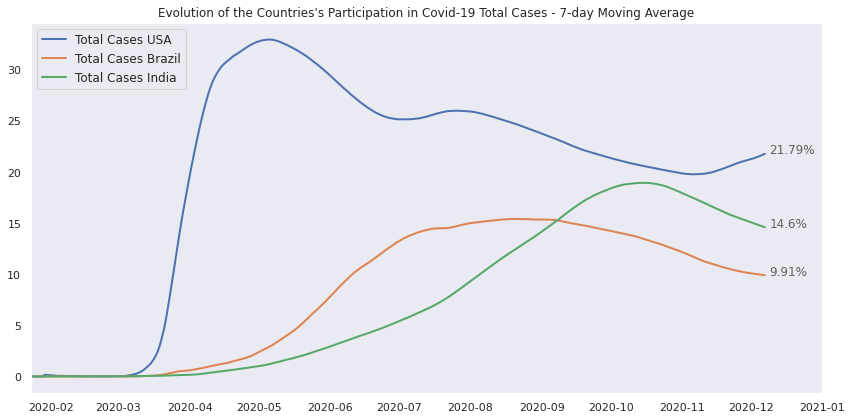

In [ ]:
# Total cases of the countries

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_countries_4["date"], df_countries_4["total_cases_usa"], label="Total Cases USA", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["total_cases_brazil"], label="Total Cases Brazil", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["total_cases_india"], label="Total Cases India", linestyle="solid", linewidth=2)

ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,1], s=f'{df_countries_4.iloc[-1,1]}%', alpha=0.7)
ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,5], s=f'{df_countries_4.iloc[-1,5]}%', alpha=0.7)
ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,9], s=f'{df_countries_4.iloc[-1,9]}%', alpha=0.7)

ax.set_title("Evolution of the Countries's Participation in Covid-19 Total Cases - 7-day Moving Average")

ax.set_xlim(df_countries_4.iloc[0,0], df_countries_4.iloc[-1,0] + dt.timedelta(days=25))

ax.grid((False))
ax.legend(loc='upper left', fontsize = 12)

plt.tight_layout()
plt.show()

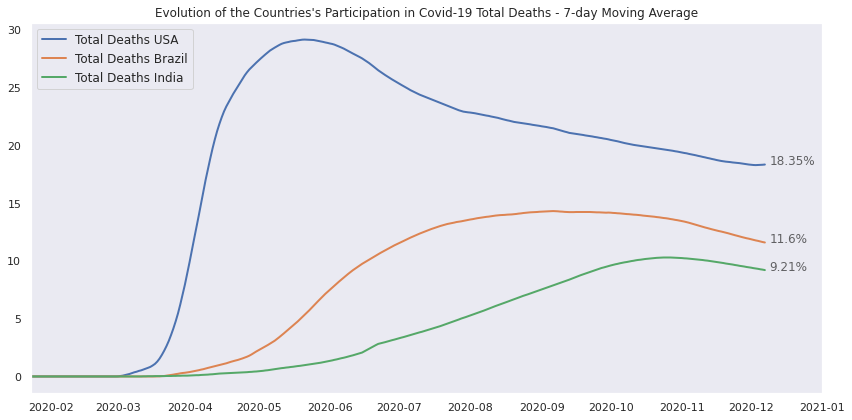

In [ ]:
# Total deaths of the countries

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_countries_4["date"], df_countries_4["total_deaths_usa"], label="Total Deaths USA", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["total_deaths_brazil"], label="Total Deaths Brazil", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["total_deaths_india"], label="Total Deaths India", linestyle="solid", linewidth=2)

ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,2], s=f'{df_countries_4.iloc[-1,2]}%', alpha=0.7)
ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,6], s=f'{df_countries_4.iloc[-1,6]}%', alpha=0.7)
ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,10], s=f'{df_countries_4.iloc[-1,10]}%', alpha=0.7)

ax.set_title("Evolution of the Countries's Participation in Covid-19 Total Deaths - 7-day Moving Average")

ax.set_xlim(df_countries_4.iloc[0,0], df_countries_4.iloc[-1,0] + dt.timedelta(days=25))

ax.grid((False))
ax.legend(loc='upper left', fontsize = 12)

plt.tight_layout()
plt.show()

The 7-day moving average of the participation of both total cases and total deaths show that the USA presents way higher participation in comparison to Brazil and India. 

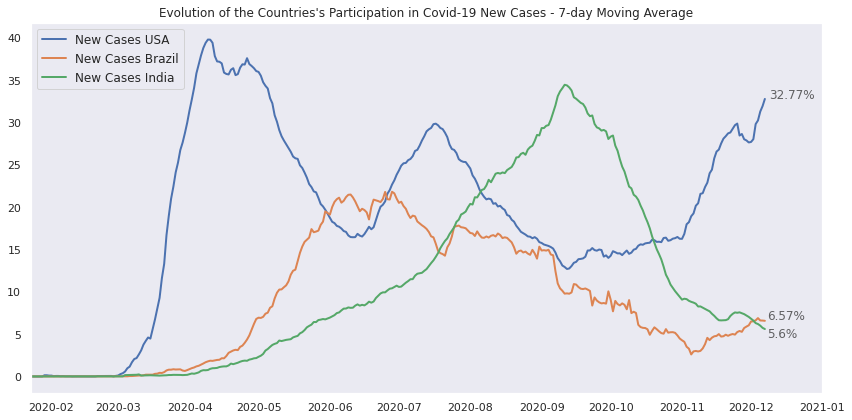

In [ ]:
# New cases of the countries

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_countries_4["date"], df_countries_4["new_cases_usa"], label="New Cases USA", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["new_cases_brazil"], label="New Cases Brazil", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["new_cases_india"], label="New Cases India", linestyle="solid", linewidth=2)

ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,3], s=f'{df_countries_4.iloc[-1,3]}%', alpha=0.7)
ax.text(x=0.93, y=0.2, s=f'{df_countries_4.iloc[-1,7]}%', alpha=0.7, transform=ax.transAxes)
ax.text(x=0.93, y=0.15, s=f'{df_countries_4.iloc[-1,11]}%', alpha=0.7, transform=ax.transAxes)

ax.set_title("Evolution of the Countries's Participation in Covid-19 New Cases - 7-day Moving Average")

ax.set_xlim(df_countries_4.iloc[0,0], df_countries_4.iloc[-1,0] + dt.timedelta(days=25))

ax.grid((False))
ax.legend(loc='upper left', fontsize = 12)

plt.tight_layout()
plt.show()

In this last graph, it is possible to see that the participation of new cases of USA in the world reached almost 40% by April. Certainly at that time other countries contributed more than Brazil and India, that presented less than 5% of participation. 

The evolution of the participation of each country along the year is quite different. USA presents three peaks of new cases, while in India, the new cases increases until the beginning of october and then its participation decreases. Brazil's participation rapidly increases until june and july and then gradualy decreases. 

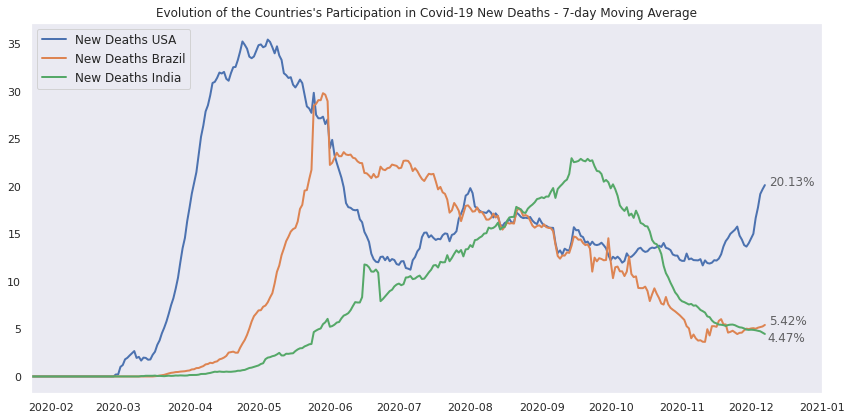

In [ ]:
# New deaths of the countries

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_countries_4["date"], df_countries_4["new_deaths_usa"], label="New Deaths USA", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["new_deaths_brazil"], label="New Deaths Brazil", linestyle="solid", linewidth=2)
ax.plot(df_countries_4["date"], df_countries_4["new_deaths_india"], label="New Deaths India", linestyle="solid", linewidth=2)

ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,4], s=f'{df_countries_4.iloc[-1,4]}%', alpha=0.7)
ax.text(x=df_countries_4.iloc[-1,0] + dt.timedelta(days=2), y=df_countries_4.iloc[-1,8], s=f'{df_countries_4.iloc[-1,8]}%', alpha=0.7)
ax.text(x=0.93, y=0.14, s=f'{df_countries_4.iloc[-1,12]}%', alpha=0.7, transform=ax.transAxes)

ax.set_title("Evolution of the Countries's Participation in Covid-19 New Deaths - 7-day Moving Average")

ax.set_xlim(df_countries_4.iloc[0,0], df_countries_4.iloc[-1,0] + dt.timedelta(days=25))

ax.grid((False))
ax.legend(loc='upper left', fontsize = 12)

plt.tight_layout()
plt.show()

The participation of USA, India and Brazil in the number of new deaths along the year is seen in the figure above. It is noticeable that the participation of new deaths follows the participation of new cases in each country. 

## Conclusion

This work analyzed the COVID-19 dataset published by My World in Data considering the following steps:

* Overall exploratory data analysis: first analyses of the dataset. Knowing the size of the dataset, what are the variables, what are the types of variables, minimum and maximum values of some variables, percentage of null values of each variable, etc. 

* Analysis of the countries with higher numbers of cases and deaths of COVID-19: use of bar chart to visualize the data. 

* Analysis of the COVID-19 scenario in the world: plot of the evolution of the total number of cases and deaths in the world.

* Comparing Brazil's COVID-19 scenario in the world: evolution of total number of cases and deaths considering countries with highest numbers and focusing on Brazil. Manipulation of data through Pandas commandas to know for example how many days it took for Brazil to have the first COVID-19 death ever since the first case in the country.

* Analysis of the 3 countries with highest numbers of cases and deaths: participation of each country in comparison with the rest of the world (use of waffle chart), evolution along the year of the participation of each country in total and daily number of cases and deaths considering 7-day moving average. 




The objective of this work was achieved: using Python libraries to analyze and obtain information from a real-world COVID-19 dataset. This work gave me a great opportunity to practice and learn more about Pandas and Matplotlib.
Much could be talked and discussed from all the information obtained from this COVID-19 dataset and soon I'll be writing an article from this analysis. 